# Data Cleaning

In [1]:
%matplotlib inline

import os
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import urllib.request
import glob, os
import re
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
sno = nltk.stem.SnowballStemmer('english')
ps = nltk.stem.PorterStemmer()
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler

In [2]:
retval=os.chdir("..")

In [3]:
retval=os.chdir("input/clean_data/")
countries = glob.glob("*.txt")
countries = [w.replace('.txt', '') for w in countries]
countries.sort()
retval=os.chdir("../..")

In [4]:
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards']
stopwords += ['again', 'against', 'all', 'almost', 'alone', 'along']
stopwords += ['already', 'also', 'although', 'always', 'am', 'among']
stopwords += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another']
stopwords += ['any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
stopwords += ['are', 'around', 'as', 'at', 'back', 'be', 'became']
stopwords += ['because', 'become', 'becomes', 'becoming', 'been']
stopwords += ['before', 'beforehand', 'behind', 'being', 'below']
stopwords += ['beside', 'besides', 'between', 'beyond', 'bill', 'both']
stopwords += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant']
stopwords += ['co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
stopwords += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due']
stopwords += ['during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
stopwords += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever']
stopwords += ['every', 'everyone', 'everything', 'everywhere', 'except']
stopwords += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first']
stopwords += ['five', 'for', 'former', 'formerly', 'forty', 'found']
stopwords += ['four', 'from', 'front', 'full', 'further', 'get', 'give']
stopwords += ['go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
stopwords += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers']
stopwords += ['herself', 'him', 'himself', 'his', 'how', 'however']
stopwords += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed']
stopwords += ['interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
stopwords += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made']
stopwords += ['many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
stopwords += ['more', 'moreover', 'most', 'mostly', 'move', 'much']
stopwords += ['must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
stopwords += ['nevertheless', 'next', 'nine', 'no', 'nobody', 'none']
stopwords += ['noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
stopwords += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or']
stopwords += ['other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
stopwords += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please']
stopwords += ['put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
stopwords += ['seeming', 'seems', 'serious', 'several', 'she', 'should']
stopwords += ['show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
stopwords += ['some', 'somehow', 'someone', 'something', 'sometime']
stopwords += ['sometimes', 'somewhere', 'still', 'such', 'system', 'take']
stopwords += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves']
stopwords += ['then', 'thence', 'there', 'thereafter', 'thereby']
stopwords += ['therefore', 'therein', 'thereupon', 'these', 'they']
stopwords += ['thick', 'thin', 'third', 'this', 'those', 'though', 'three']
stopwords += ['three', 'through', 'throughout', 'thru', 'thus', 'to']
stopwords += ['together', 'too', 'top', 'toward', 'towards', 'twelve']
stopwords += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon']
stopwords += ['us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
stopwords += ['whatever', 'when', 'whence', 'whenever', 'where']
stopwords += ['whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
stopwords += ['wherever', 'whether', 'which', 'while', 'whither', 'who']
stopwords += ['whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
stopwords += ['within', 'without', 'would', 'yet', 'you', 'your']
stopwords += ['yours', 'yourself', 'yourselves']
#stopwords = [x.upper() for x in stopwords]

In [5]:
def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]
def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(zip(wordlist,wordfreq))
def sortFreqDict(freqdict):
    aux = [(key, freqdict[key]) for key in freqdict]
    aux.sort()
    return aux

In [6]:
df = pd.DataFrame("", index=np.arange(0), columns=['word'])
print("NON-AVAILABLE COUNTRIES:")
for country in countries:
    with open('input/clean_data/{}.txt'.format(country), 'r') as myfile:
        speech=myfile.read().replace('\n', '')
    speech = speech.lower()
    speech = re.sub('[^a-z]', ' ', speech)
    wordlist = speech.split()
    wordlist = removeStopwords(wordlist=wordlist, stopwords = stopwords)
    
    table = sortFreqDict(wordListToFreqDict(wordlist=wordlist))
    
    if len(table) == 0:
        print(country)
        
    else:
        table = pd.DataFrame(np.array(table), columns = ['word', 'count'])
        table['count'] = pd.to_numeric(table['count'])
#        table['word_1'] = table['word'].apply(lambda x: lmtzr.lemmatize(x))
#        table['word_2'] = table['word'].apply(lambda x: ps.stem(x))
        table['word_3'] = table['word'].apply(lambda x: sno.stem(x))

        grouped = pd.DataFrame({'freq' : table.groupby(['word_3'])['count'].agg('sum')}).reset_index()
    
        df = pd.merge(df, grouped, how = 'outer', left_on='word', right_on='word_3')
        df['word'] = np.where(df['word'].isnull(), df['word_3'], df['word'])
        df[country] = df['freq']
        del df['word_3']
        del df['freq']

df = df.sort_values('word').reset_index(drop = True)

NON-AVAILABLE COUNTRIES:
Bahrain
Kenya
Lao_People’s_Democratic_Republic
Lebanon
Mongolia
Nicaragua
Palestine_(State_of)
Qatar
The_former_Yugoslav_Republic_of_Macedonia


In [27]:
df.describe(include = 'all')

,word,Afghanistan,Albania,Angola,Antigua_and_Barbuda,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom_of_Great_Britain_and_Northern_Ireland,United_Republic_of_Tanzania,United_States_of_America,Uzbekistan,Viet_Nam,Zambia,Zimbabwe
count,10067,577.000000,566.000000,503.000000,601.000000,498.000000,446.000000,394.000000,483.000000,674.000000,...,249.000000,680.000000,553.000000,650.000000,669.000000,926.000000,537.000000,443.000000,537.000000,404.000000
unique,10067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,jewish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.646447,1.787986,1.960239,1.853577,1.730924,1.863229,1.703046,2.082816,1.937685,...,1.469880,1.963235,2.193490,2.149231,1.704036,2.379050,1.940410,1.823928,1.864060,1.603960
std,NaN,1.563403,1.590101,2.374837,2.119400,1.835237,2.125636,1.416242,3.146060,2.436529,...,1.066393,2.549678,2.911838,2.393663,2.044197,3.980758,1.928814,1.985391,2.106793,1.748898
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.250000


## Example of USA and France:

In [8]:
usa_france = df[['word', 'United_States_of_America', 'France']]
usa_france = usa_france[(usa_france['United_States_of_America'].isnull() == False) 
                        |(usa_france['France'].isnull() == False) 
                       ].reset_index(drop = True)

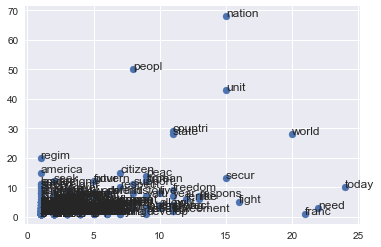

In [9]:
y=usa_france['United_States_of_America']
z=usa_france['France']
n=usa_france['word']

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))

## PCA on word count:

In [10]:
df1 = df.copy()
print(df1.shape)

(10067, 139)


In [11]:
columns = list(df1)
country_columns = columns[1:]
for country in country_columns:
    df1[country] = df1[country].fillna(0)

___ Limit data to words refered to by at least X countries:___

In [12]:
df1['occurrence'] = df1.astype(bool).sum(axis=1)
df1 = df1[df1['occurrence']>5]
del df1['occurrence']
print(df1.shape)

(2596, 139)


___ PCA analysis:___

In [13]:
df2 = df1.transpose().copy()
df2.columns = df2.iloc[0].values.tolist()
df2 = df2.iloc[1:]
df2 = df2.reset_index()

In [14]:
X = df2.iloc[:,1:].values
y_ = df2.iloc[:, 0].values

In [16]:
X_std = StandardScaler().fit_transform(X)

/Users/nj995/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

___Plot 2 axes:___

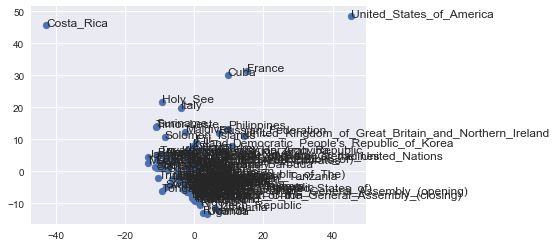

In [18]:
y=Y_sklearn[:,0]
z=Y_sklearn[:,1]
n=y_

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))